In [1]:
import gpaw
import ase
import matplotlib.pyplot as plt
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [7]:
def no_point_charge():
    d = 1.1
    h2 = ase.Atoms('H2', [(0, 0, 0), (0, 0, d)], pbc=True,)
    h2.center(vacuum=2.5)
    #pc = gpaw.external.PointChargePotential([1., 1.], h2.get_positions())
    pc = None
    calc = gpaw.GPAW(mode=gpaw.PW(300),xc='LDA', txt='h2.txt', external=pc)
    h2.set_calculator(calc)
    h2.get_potential_energy()
    calc.write('run.gpaw', mode='all')
    calc2 = gpaw.GPAW('run.gpaw')
    return calc2
q = no_point_charge()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.2
 |___|_|             

User:   guido@bismuth
Date:   Fri Jun  7 16:30:04 2019
Arch:   x86_64
Pid:    19310
Python: 3.5.6
gpaw:   /home/guido/.local/lib/python3.5/site-packages/gpaw
_gpaw:  /home/guido/.local/lib/python3.5/site-packages/
        _gpaw.cpython-35m-x86_64-linux-gnu.so
ase:    /home/guido/miniconda3/envs/gpaw/lib/python3.5/site-packages/ase (version 3.16.2)
numpy:  /home/guido/miniconda3/envs/gpaw/lib/python3.5/site-packages/numpy (version 1.15.1)
scipy:  /home/guido/miniconda3/envs/gpaw/lib/python3.5/site-packages/scipy (version 1.1.0)
units:  Angstrom and eV
cores:  1

Reading from run.gpaw
Read dipole, energy, free_energy
Reading input parameters:
  mode: {ecut: 300.0,
         gammacentered: False,
         name: pw}

Initialize ...

H-setup:
  name: Hydrogen
  id: 4766778ce56282eaa64abeb28b7c1de3
  Z: 1
  valence: 1
  core: 0
  charge: 0.0
  file: /opt/gpaw/gpaw-setups-0.9.2

In [18]:
def point_charge():
    d = 1.1
    h2 = ase.Atoms('H2', [(0, 0, 0), (0, 0, d)], pbc=True,)
    h2.center(vacuum=2.5)
    pc = gpaw.external.PointChargePotential([1., 1.], h2.get_positions())
    calc = gpaw.GPAW(mode=gpaw.PW(300),xc='LDA', txt='h2.txt', external=pc)
    h2.set_calculator(calc)
    h2.get_potential_energy()
    calc.parameters.external = None
    calc.write('run.gpaw', mode='all')
    calc2 = gpaw.GPAW('run.gpaw')
    return calc2
qq = point_charge()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.2
 |___|_|             

User:   guido@bismuth
Date:   Fri Jun  7 16:36:35 2019
Arch:   x86_64
Pid:    19310
Python: 3.5.6
gpaw:   /home/guido/.local/lib/python3.5/site-packages/gpaw
_gpaw:  /home/guido/.local/lib/python3.5/site-packages/
        _gpaw.cpython-35m-x86_64-linux-gnu.so
ase:    /home/guido/miniconda3/envs/gpaw/lib/python3.5/site-packages/ase (version 3.16.2)
numpy:  /home/guido/miniconda3/envs/gpaw/lib/python3.5/site-packages/numpy (version 1.15.1)
scipy:  /home/guido/miniconda3/envs/gpaw/lib/python3.5/site-packages/scipy (version 1.1.0)
units:  Angstrom and eV
cores:  1

Reading from run.gpaw
Read dipole, energy, free_energy
Reading input parameters:
  mode: {ecut: 300.0,
         gammacentered: False,
         name: pw}

Initialize ...

H-setup:
  name: Hydrogen
  id: 4766778ce56282eaa64abeb28b7c1de3
  Z: 1
  valence: 1
  core: 0
  charge: 0.0
  file: /opt/gpaw/gpaw-setups-0.9.2

In [25]:
def plot_calc(calc, label, axis):
    gridrefinement = 1  # needs to be 1!
    gridpos = calc.density.gd.get_grid_point_coordinates()
    dens = calc.get_all_electron_density(gridrefinement=gridrefinement)
    dv = 1
    dens *= dv / gridrefinement**3
    print ('total n electrons', dens.sum())
    xs = []
    ys = []
    gridz = sorted(set(gridpos[axis].reshape(-1)))
    for idx in range(len(gridz)):
        xs.append(gridz[idx])
        ys.append(np.sum(dens[np.where(gridpos[axis] == gridz[idx])]))
    plt.plot(xs, ys, label=label)
    #plt.ylim(0, max(ys)*1.1)
    plt.legend()

total n electrons 125.90163934426229
total n electrons 125.90163934423477


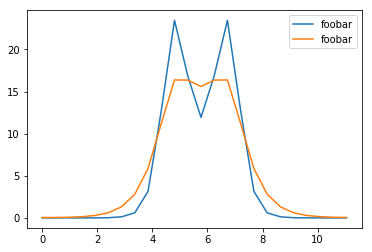

In [27]:
plot_calc(qq, 'foobar', 2)
plot_calc(q, 'foobar', 2)